<a href="https://colab.research.google.com/github/sergioGarcia91/ML_and_EDA/blob/main/02a_GeologiaMesa_MLPClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-layer Perceptron Classifier - Dataset: Geología Mesa de Los Santos

Este conjunto de datos está compuesto por dos archivos principales:

1. **CortesMesaLosSantos_Pinto_etal_2007.csv**
2. **GeologiaMesaLosSantos_Pinto_etal_2007.csv**

> *Ser tan rápidos como el más lento, \
> y ser tan lentos como el más rápido.*

**Autor:** Sergio Andrés García Arias  
**Versión 01:** Diciembre 2023

# Introducción

En este Notebook utilizaremos el algoritmo de clasificación supervisada conocido como `Multi-layer Perceptron Classifier`. Este algoritmo le proporcionamos al modelo los datos de entrada y sus correspondientes etiquetas de salida, permitiéndole aprender a asignar adecuadamente nuevas instancias a sus respectivos grupos.

> **Observación:** En este notebook hemos decidido omitir la realización del EDA. En un Notebook posterior abordaremos este aspecto para profundizar en la comprensión de los datos. Lo recomendable es llevar a cabo el EDA antes de aplicar el `MLP Classifier` para obtener una visión más completa del conjunto de datos.

## ¿Cómo funciona?
Un Perceptrón Multicapa (MLP, por sus siglas en inglés) es una `Red Neuronal Artificial` con al menos tres capas:

- **Entrada**
- **Una o más ocultas**
- **Salida**

Durante la propagación hacia adelante, las conexiones entre neuronas tienen pesos ajustables y se aplica una función de activación. Las capas ocultas introducen no linealidades para abordar problemas complejos.

Durante el entrenamiento, se utiliza retropropagación para ajustar pesos y sesgos, minimizando una función de pérdida. Después del entrenamiento, el MLP puede hacer predicciones para nuevas entradas. La arquitectura, funciones de activación y parámetros se ajustan para lograr un rendimiento óptimo.

<center>
<img src='https://upload.wikimedia.org/wikipedia/commons/6/64/RedNeuronalArtificial.png' width=500 />

Red Neuronal Artificial de tipo perceptrón simple con n neuronas de entrada, m neuronas en su capa oculta y una neurona de salida. *Fuente: [Wikipedia](https://es.wikipedia.org/wiki/Perceptrón_multicapa)*
</center>

# Geología Mesa de Los Santos
Los archivos `CSV` que se cargarán en este Notebook contienen puntos de ubicación con valores correspondientes a la formación geológica a la que pertenecen. La información geológica fue recopilada teniendo en cuenta los estudios realizados por `Pinto et al. (2007)` y `Vargas (2008)`.

> **Observación:** Solo se va a considerar las unidades geológicas. Aunque en el Mapa y Cortes geológicos proporcionan información sobre las fallas en la Mesa de Los Santos, hemos decidido no tenerlas en cuenta.

<br>
<br>

<center>
<img src='https://github.com/sergioGarcia91/ML_and_EDA/blob/main/Datasets/MapaGeologicoMesaLosSantos_Vargas_2008.png?raw=true' width=800 />

Mapa geológico de la Mesa de Los Santos. *Fuente: Vargas (2008).*
<br>
<br>

<img src='https://github.com/sergioGarcia91/ML_and_EDA/blob/main/Datasets/Corte_B.png?raw=true' width=800 />

Corte geológico B de la Mesa de Los Santos. *Fuente: Pinto et al. (2007).*
<br>
<br>

<img src='https://github.com/sergioGarcia91/ML_and_EDA/blob/main/Datasets/Corte_C.png?raw=true' width=800 />

Corte geológico C de la Mesa de Los Santos. *Fuente: Pinto et al. (2007).*
<br>
<br>

<img src='https://github.com/sergioGarcia91/ML_and_EDA/blob/main/Datasets/Corte_D.png?raw=true' width=800 />

Corte geológico D de la Mesa de Los Santos. *Fuente: Pinto et al. (2007).*
<br>
<br>

<img src='https://github.com/sergioGarcia91/ML_and_EDA/blob/main/Datasets/Corte_E.png?raw=true' width=800 />

Corte geológico E de la Mesa de Los Santos. *Fuente: Pinto et al. (2007).*
<br>
<br>

<img src='https://github.com/sergioGarcia91/ML_and_EDA/blob/main/Datasets/Corte_F.png?raw=true' width=800 />

Corte geológico F de la Mesa de Los Santos. *Fuente: Pinto et al. (2007).*
</center>


# Inicio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import skimage # Para cargar las imagenes

from matplotlib.lines import Line2D # Para una leyenda personalizada
from sklearn.neural_network import MLPClassifier # Para la Red Neuronal
from sklearn.model_selection import train_test_split # Para dividir en entrenamiento y prueba

# URLs

In [2]:
url_MapaGeo ='https://github.com/sergioGarcia91/ML_and_EDA/blob/main/Datasets/MapaGeologicoMesaLosSantos_Vargas_2008.png?raw=true'

url_CorteB ='https://github.com/sergioGarcia91/ML_and_EDA/blob/main/Datasets/Corte_B.png?raw=true'

url_CorteC ='https://github.com/sergioGarcia91/ML_and_EDA/blob/main/Datasets/Corte_C.png?raw=true'

url_CorteD ='https://github.com/sergioGarcia91/ML_and_EDA/blob/main/Datasets/Corte_D.png?raw=true'

url_CorteE ='https://github.com/sergioGarcia91/ML_and_EDA/blob/main/Datasets/Corte_E.png?raw=true'

url_CorteF ='https://github.com/sergioGarcia91/ML_and_EDA/blob/main/Datasets/Corte_F.png?raw=true'

url_CSV_Cortes = 'https://github.com/sergioGarcia91/ML_and_EDA/raw/main/Datasets/CortesMesaLosSantos_Pinto_etal_2007.csv'

url_CSV_Mapa = 'https://github.com/sergioGarcia91/ML_and_EDA/raw/main/Datasets/GeologiaMesaLosSantos_Pinto_etal_2007.csv'

In [3]:
dic_URLs_Cortes = {'b': url_CorteB,
                   'c': url_CorteC,
                   'd': url_CorteD,
                   'e': url_CorteE,
                   'f': url_CorteF,
                   'mapa': url_MapaGeo}

## Cargar CSVs

In [4]:
# CSV de los cortes geologicos
df_Cortes = pd.read_csv(url_CSV_Cortes, sep=',', decimal='.')
#df_Cortes = df_Cortes[['coorX', 'coorY', 'coorZ', 'formacion', 'corte']]

df_Cortes.head()

X           Z        coorX        coorY       coorZ formacion  \
0    2.289206  297.682715  1099038.130  1254000.839  297.682715    Jordan   
1   47.553060  274.460319  1099080.244  1254017.428  274.460319    Jordan   
2   83.451978  269.835659  1099113.645  1254030.585  269.835659    Jordan   
3  123.929309  260.563217  1099151.306  1254045.420  260.563217    Jordan   
4  172.314807  297.808242  1099196.325  1254063.154  297.808242    Jordan   

  corte  
0     B  
1     B  
2     B  
3     B  
4     B

In [5]:
df_Cortes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18997 entries, 0 to 18996
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          18997 non-null  float64
 1   Z          18997 non-null  float64
 2   coorX      18997 non-null  float64
 3   coorY      18997 non-null  float64
 4   coorZ      18997 non-null  float64
 5   formacion  18997 non-null  object 
 6   corte      18997 non-null  object 
dtypes: float64(5), object(2)
memory usage: 1.0+ MB


In [6]:
df_Cortes.describe()

X             Z         coorX         coorY         coorZ
count  18997.000000  18997.000000  1.899700e+04  1.899700e+04  18997.000000
mean    5160.039956    812.758038  1.104900e+06  1.243672e+06    812.758038
std     3190.302285    461.764797  5.279915e+03  5.083680e+03    461.764797
min     -260.327156   -144.926288  1.096747e+06  1.238517e+06   -144.926288
25%     2625.055293    453.976958  1.100618e+06  1.239331e+06    453.976958
50%     4724.837815    811.508795  1.103320e+06  1.242254e+06    811.508795
75%     7302.296690   1161.575876  1.108843e+06  1.245131e+06   1161.575876
max    14837.061150   1836.929091  1.119133e+06  1.258032e+06   1836.929091

In [7]:
# CSV del mapa geologico
df_MapaGeo = pd.read_csv(url_CSV_Mapa, sep=',', decimal='.')
df_MapaGeo.columns = ['coorX', 'coorY', 'coorZ', 'formacion']
df_MapaGeo['corte'] = 'mapa'
df_MapaGeo['X'] = np.nan
df_MapaGeo['Z'] = np.nan

df_MapaGeo.head()

coorX       coorY   coorZ formacion corte   X   Z
0  1109036.77  1259898.34  1284.0   K1ls_mi  mapa NaN NaN
1  1109136.77  1259898.34  1309.0   K1ls_mi  mapa NaN NaN
2  1109236.77  1259898.34  1317.0   K1ls_mi  mapa NaN NaN
3  1109336.77  1259898.34  1330.0   K1ls_mi  mapa NaN NaN
4  1109436.77  1259898.34  1350.0   K1ls_mi  mapa NaN NaN

In [8]:
df_MapaGeo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59822 entries, 0 to 59821
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   coorX      59822 non-null  float64
 1   coorY      59822 non-null  float64
 2   coorZ      59822 non-null  float64
 3   formacion  59822 non-null  object 
 4   corte      59822 non-null  object 
 5   X          0 non-null      float64
 6   Z          0 non-null      float64
dtypes: float64(5), object(2)
memory usage: 3.2+ MB


In [9]:
df_MapaGeo.describe()

coorX         coorY         coorZ    X    Z
count  5.982200e+04  5.982200e+04  59822.000000  0.0  0.0
mean   1.107521e+06  1.246644e+06   1120.146013  NaN  NaN
std    5.732880e+03  6.243371e+03    449.036471  NaN  NaN
min    1.096747e+06  1.235598e+06   -144.926288  NaN  NaN
25%    1.102547e+06  1.241398e+06    806.307698  NaN  NaN
50%    1.107237e+06  1.245498e+06   1176.000000  NaN  NaN
75%    1.112237e+06  1.252098e+06   1509.000000  NaN  NaN
max    1.119937e+06  1.259898e+06   1836.929091  NaN  NaN

## Unir CSVs

In [10]:
# Procedemos a dejar los 2 archivos CSV en un solo DataFrame
df_GeoMesaLosSantos = pd.concat([df_Cortes, df_MapaGeo],
                                axis=0, # Que ingresen como filas
                                )

df_GeoMesaLosSantos['corte'] = df_GeoMesaLosSantos['corte'].str.lower()
df_GeoMesaLosSantos['formacion'] = df_GeoMesaLosSantos['formacion'].str.lower()

df_GeoMesaLosSantos.head()

X           Z        coorX        coorY       coorZ formacion  \
0    2.289206  297.682715  1099038.130  1254000.839  297.682715    jordan   
1   47.553060  274.460319  1099080.244  1254017.428  274.460319    jordan   
2   83.451978  269.835659  1099113.645  1254030.585  269.835659    jordan   
3  123.929309  260.563217  1099151.306  1254045.420  260.563217    jordan   
4  172.314807  297.808242  1099196.325  1254063.154  297.808242    jordan   

  corte  
0     b  
1     b  
2     b  
3     b  
4     b

In [11]:
df_GeoMesaLosSantos.tail()

X   Z        coorX        coorY        coorZ   formacion corte
59817 NaN NaN  1113582.158  1244003.287  1798.078783  rosablanca  mapa
59818 NaN NaN  1113600.087  1244010.640  1779.071029  rosablanca  mapa
59819 NaN NaN  1113613.688  1244016.218  1786.674130  rosablanca  mapa
59820 NaN NaN  1113623.333  1244020.174  1772.803607  rosablanca  mapa
59821 NaN NaN  1113635.945  1244025.346  1775.153890  rosablanca  mapa

In [12]:
df_GeoMesaLosSantos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78819 entries, 0 to 59821
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          18997 non-null  float64
 1   Z          18997 non-null  float64
 2   coorX      78819 non-null  float64
 3   coorY      78819 non-null  float64
 4   coorZ      78819 non-null  float64
 5   formacion  78819 non-null  object 
 6   corte      78819 non-null  object 
dtypes: float64(5), object(2)
memory usage: 4.8+ MB


In [13]:
np.round(df_GeoMesaLosSantos.describe(), 2)

X         Z       coorX       coorY     coorZ
count  18997.00  18997.00    78819.00    78819.00  78819.00
mean    5160.04    812.76  1106889.50  1245927.60   1046.06
std     3190.30    461.76     5737.61     6117.91    470.86
min     -260.33   -144.93  1096747.21  1235598.34   -144.93
25%     2625.06    453.98  1101936.77  1240998.34    700.20
50%     4724.84    811.51  1106336.77  1244169.88   1104.00
75%     7302.30   1161.58  1111736.77  1250898.34   1436.00
max    14837.06   1836.93  1119936.77  1259898.34   1836.93

# Preparación Previa

Antes de avanzar con el entrenamiento del modelo, se realizará una verificación para asegurar que la columna `formacion` contenga expresiones uniformes para cada unidad geológica. Además, se creará una nueva columna asignando un color a cada formación y otra columna con etiquetas numéricas consecutivas para representar la secuencia geológica que será utilizada en el entrenamiento de la red neuronal.

In [14]:
print('Valores unicos en la columna: corte')
print(df_GeoMesaLosSantos['corte'].unique())

print('\n')

print('Valores unicos en la columna: formacion')
print(df_GeoMesaLosSantos['formacion'].unique())

Valores unicos en la columna: corte
['b' 'c' 'd' 'e' 'f' 'mapa']


Valores unicos en la columna: formacion
['jordan' 'lossantos_inf' 'lossantos_med' 'lossantos_sup' 'granito'
 'silgara' 'rosablanca' 'paja' 'tablazo' 'lossantoos_sup' 'k1ls_mi'
 'j1-2j' 'oss' 'j1gp' 'k1ls_mm' 'k1ls_ms' 'k1r' 'k1p' 'k1t']


## Unidades geológicas

In [15]:
dicc_ReplaceUnidades = {'jordan': 'j1-2j',
                        'lossantos_inf': 'k1ls_mi',
                        'lossantos_med': 'k1ls_mm',
                        'lossantos_sup': 'k1ls_ms',
                        'granito': 'j1gp',
                        'silgara': 'oss',
                        'rosablanca': 'k1r',
                        'paja': 'k1p',
                        'tablazo': 'k1t',
                        'lossantoos_sup': 'k1ls_ms'}

# Reemplazar y tener los mismos valores en todas la unidades

df_GeoMesaLosSantos['formacion'].replace(dicc_ReplaceUnidades,
                                         inplace=True)

print('Valores unicos en la columna: corte')
print(df_GeoMesaLosSantos['corte'].unique())

print('\n')

print('Valores unicos en la columna: formacion')
print(df_GeoMesaLosSantos['formacion'].unique())

Valores unicos en la columna: corte
['b' 'c' 'd' 'e' 'f' 'mapa']


Valores unicos en la columna: formacion
['j1-2j' 'k1ls_mi' 'k1ls_mm' 'k1ls_ms' 'j1gp' 'oss' 'k1r' 'k1p' 'k1t']


## Color

In [16]:
#diccionaraio para acolores geologia
dic_colores = {'oss':'tab:purple',
               'j1gp':'tab:pink',
               'j1-2j':'tab:cyan',
               'k1ls_mi':'tab:green',
               'k1ls_mm':'lime',
               'k1ls_ms':'yellow',
               'k1r':'tab:brown',
               'k1p':'tab:olive',
               'k1t':'tab:orange'}


df_GeoMesaLosSantos['color'] = df_GeoMesaLosSantos['formacion'].replace(dic_colores,
                                                                        inplace=False)

df_GeoMesaLosSantos.head()

X           Z        coorX        coorY       coorZ formacion  \
0    2.289206  297.682715  1099038.130  1254000.839  297.682715     j1-2j   
1   47.553060  274.460319  1099080.244  1254017.428  274.460319     j1-2j   
2   83.451978  269.835659  1099113.645  1254030.585  269.835659     j1-2j   
3  123.929309  260.563217  1099151.306  1254045.420  260.563217     j1-2j   
4  172.314807  297.808242  1099196.325  1254063.154  297.808242     j1-2j   

  corte     color  
0     b  tab:cyan  
1     b  tab:cyan  
2     b  tab:cyan  
3     b  tab:cyan  
4     b  tab:cyan

## Etiquetas

In [17]:
#diccionaraio para etiquetas
dic_unidades = {'k1t':8,
                'k1p':7,
                'k1r':6,
                'k1ls_ms':5,
                'k1ls_mm':4,
                'k1ls_mi':3,
                'j1-2j':2,
                'j1gp':1,
                'oss':0}

df_GeoMesaLosSantos['etiqueta'] = df_GeoMesaLosSantos['formacion'].replace(dic_unidades,
                                                                           inplace=False)

df_GeoMesaLosSantos.head()

X           Z        coorX        coorY       coorZ formacion  \
0    2.289206  297.682715  1099038.130  1254000.839  297.682715     j1-2j   
1   47.553060  274.460319  1099080.244  1254017.428  274.460319     j1-2j   
2   83.451978  269.835659  1099113.645  1254030.585  269.835659     j1-2j   
3  123.929309  260.563217  1099151.306  1254045.420  260.563217     j1-2j   
4  172.314807  297.808242  1099196.325  1254063.154  297.808242     j1-2j   

  corte     color  etiqueta  
0     b  tab:cyan         2  
1     b  tab:cyan         2  
2     b  tab:cyan         2  
3     b  tab:cyan         2  
4     b  tab:cyan         2

# Graficar Cortes y Mapa

In [18]:
#crear leyenda de geologia
lineasGeo = [Line2D([0], [0], color='tab:orange', lw=4),
             Line2D([0], [0], color='tab:olive', lw=4),
             Line2D([0], [0], color='tab:brown', lw=4),
             Line2D([0], [0], color='yellow', lw=4),
             Line2D([0], [0], color='lime', lw=4),
             Line2D([0], [0], color='tab:green', lw=4),
             Line2D([0], [0], color='tab:cyan', lw=4),
             Line2D([0], [0], color='tab:pink', lw=4),
             Line2D([0], [0], color='tab:purple', lw=4)]

labelsGeo = ['K1t', 'K1p', 'K1r', 'K1ls_ms', 'K1ls_mm', 'K1ls_mi', 'J1-2j', 'J1gp','OSs']


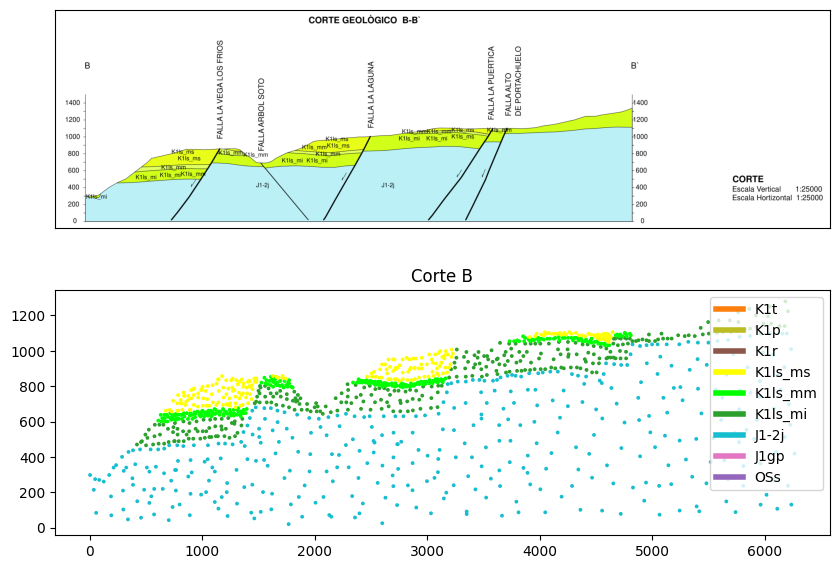

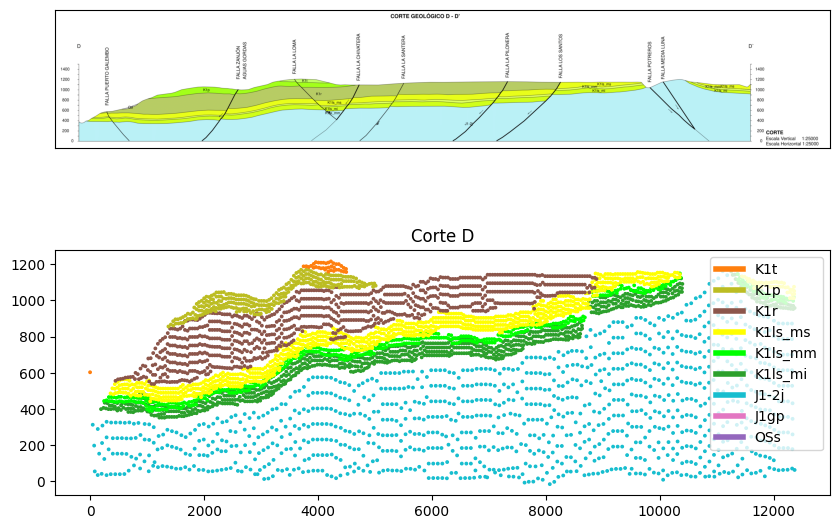

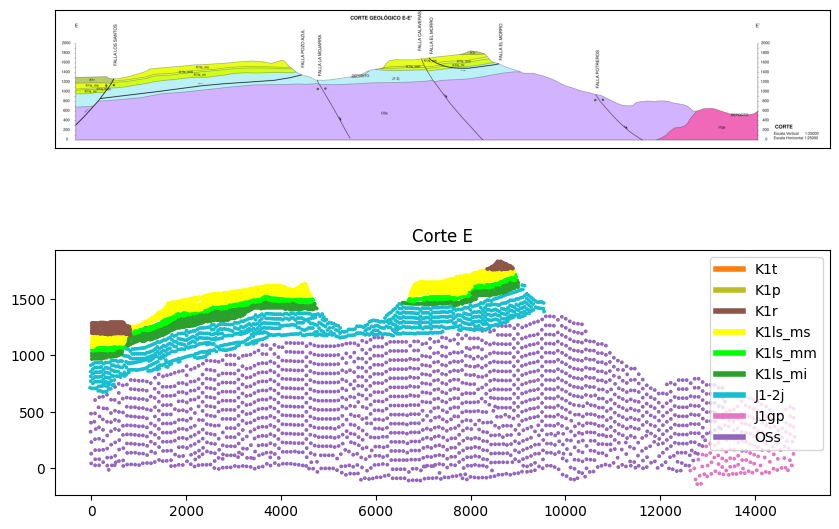

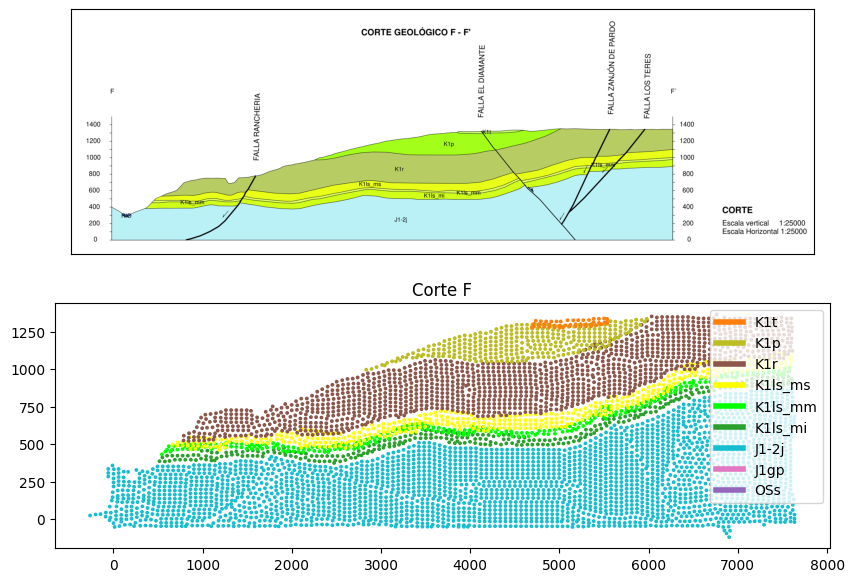

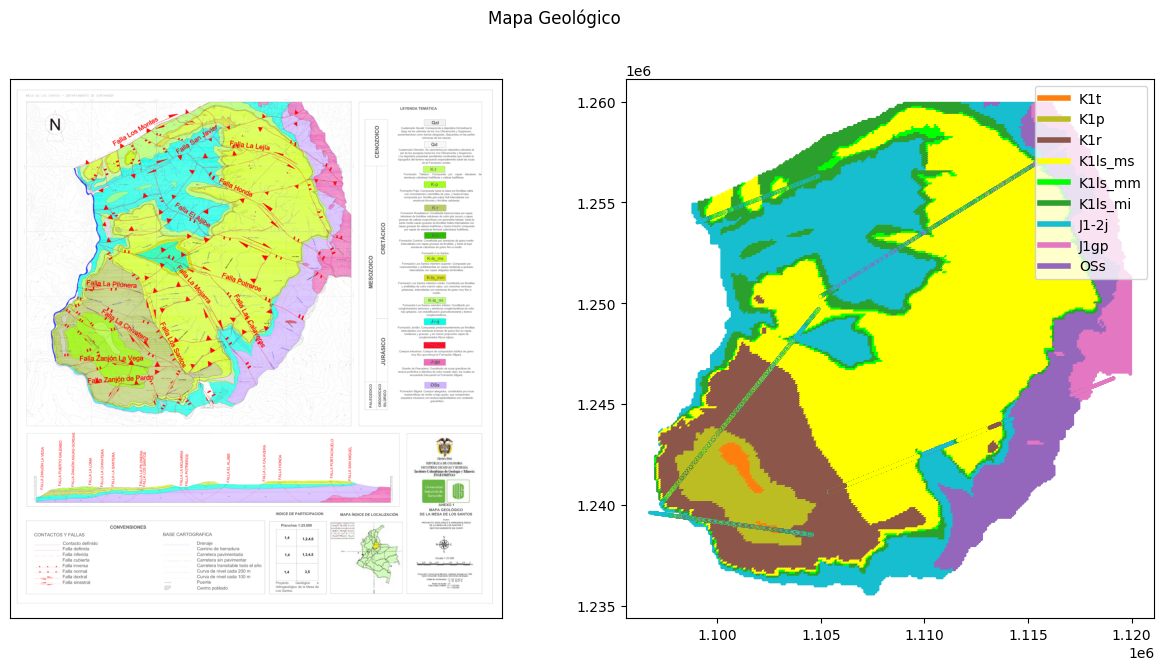

In [19]:
for i in df_GeoMesaLosSantos['corte'].unique():
  filtro = df_GeoMesaLosSantos['corte'] == i
  archivoImagens = dic_URLs_Cortes[i]
  imagen_numpy = skimage.io.imread( archivoImagens )

  if i == 'mapa':
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
    ax[0].imshow(imagen_numpy)
    #hide x-axis
    ax[0].get_xaxis().set_visible(False)
    #hide y-axis
    ax[0].get_yaxis().set_visible(False)

    ax[1].scatter(df_GeoMesaLosSantos['coorX'][filtro],
                  df_GeoMesaLosSantos['coorY'][filtro],
                  color=df_GeoMesaLosSantos['color'][filtro],
                  s=3)
    ax[1].legend(lineasGeo, labelsGeo, loc=1)

    plt.suptitle('Mapa Geológico')
    plt.show()

  else:
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,7))
    ax[0].imshow(imagen_numpy)
    #hide x-axis
    ax[0].get_xaxis().set_visible(False)
    #hide y-axis
    ax[0].get_yaxis().set_visible(False)

    ax[1].scatter(df_GeoMesaLosSantos['X'][filtro],
                  df_GeoMesaLosSantos['Z'][filtro],
                  color=df_GeoMesaLosSantos['color'][filtro],
                  s=3)
    ax[1].legend(lineasGeo, labelsGeo, loc=1)
    ax[1].set_title('Corte {}'.format(i.upper()))

    plt.show()

  print('\n')

# Escalado manual

In [20]:
np.round(df_GeoMesaLosSantos.describe(), 2)

X         Z       coorX       coorY     coorZ  etiqueta
count  18997.00  18997.00    78819.00    78819.00  78819.00  78819.00
mean    5160.04    812.76  1106889.50  1245927.60   1046.06      3.56
std     3190.30    461.76     5737.61     6117.91    470.86      2.03
min     -260.33   -144.93  1096747.21  1235598.34   -144.93      0.00
25%     2625.06    453.98  1101936.77  1240998.34    700.20      2.00
50%     4724.84    811.51  1106336.77  1244169.88   1104.00      4.00
75%     7302.30   1161.58  1111736.77  1250898.34   1436.00      5.00
max    14837.06   1836.93  1119936.77  1259898.34   1836.93      8.00

En el proceso de entrenamiento de modelos de Machine Learning, es común escalar los valores a un rango entre `0` y `1` para facilitar el aprendizaje. Aunque existen bibliotecas que ofrecen funciones para realizar este escalamiento, en esta ocasión optaremos por hacerlo manualmente.

Utilizaremos la ecuación de `Min-Max Scaling`:

$$
\begin{equation}
X = \frac{x_i - X_{min}}{X_{max} - X_{min}}
\end{equation}
$$

Esto nos permitirá normalizar los valores, proporcionando una entrada estandarizada para nuestro modelo de red neuronal.

In [21]:
# Vamos a redondear a números cerrados
Xmin = int(df_GeoMesaLosSantos['coorX'].min() / 1000) * 1000
Xmax = 1000 + int(df_GeoMesaLosSantos['coorX'].max() / 1000) * 1000

Ymin = int(df_GeoMesaLosSantos['coorY'].min() / 1000) * 1000
Ymax = 1000 + int(df_GeoMesaLosSantos['coorY'].max() / 1000) * 1000

Zmin = -10 + int(df_GeoMesaLosSantos['coorZ'].min() / 10) * 10
Zmax = 10 + int(df_GeoMesaLosSantos['coorZ'].max() / 10) * 10

print('Xmin = ', Xmin, ' km')
print('Xmax = ', Xmax, ' km')
print('Ymin = ', Ymin, ' km')
print('Ymax = ', Ymax, ' km')
print('Zmin = ', Zmin, ' km')
print('Zmax = ', Zmax, ' km')

Xmin =  1096000  km
Xmax =  1120000  km
Ymin =  1235000  km
Ymax =  1260000  km
Zmin =  -150  km
Zmax =  1840  km


In [22]:
df_GeoMesaLosSantos['Xn'] = (df_GeoMesaLosSantos['coorX'] - Xmin) / (Xmax - Xmin)
df_GeoMesaLosSantos['Yn'] = (df_GeoMesaLosSantos['coorY'] - Ymin) / (Ymax - Ymin)
df_GeoMesaLosSantos['Zn'] = (df_GeoMesaLosSantos['coorZ'] - Zmin) / (Zmax - Zmin)

df_GeoMesaLosSantos.describe()

X             Z         coorX         coorY         coorZ  \
count  18997.000000  18997.000000  7.881900e+04  7.881900e+04  78819.000000   
mean    5160.039956    812.758038  1.106889e+06  1.245928e+06   1046.059189   
std     3190.302285    461.764797  5.737614e+03  6.117910e+03    470.860902   
min     -260.327156   -144.926288  1.096747e+06  1.235598e+06   -144.926288   
25%     2625.055293    453.976958  1.101937e+06  1.240998e+06    700.198781   
50%     4724.837815    811.508795  1.106337e+06  1.244170e+06   1104.000000   
75%     7302.296690   1161.575876  1.111737e+06  1.250898e+06   1436.000000   
max    14837.061150   1836.929091  1.119937e+06  1.259898e+06   1836.929091   

           etiqueta            Xn            Yn            Zn  
count  78819.000000  78819.000000  78819.000000  78819.000000  
mean       3.555120      0.453729      0.437104      0.601035  
std        2.028025      0.239067      0.244716      0.236614  
min        0.000000      0.031134      0.023934      0.002550  
25%        2.000000      0.247365      0.239934      0.427236  
50%        4.000000      0.430699      0.366795      0.630151  
75%        5.000000      0.655699      0.635934      0.796985  
max        8.000000      0.997365      0.995934      0.998457

# Train Test Split

In [23]:
# Vamos a tomar solo nuestras columnas de interés
X = df_GeoMesaLosSantos[['Xn', 'Yn', 'Zn']].copy()
y = df_GeoMesaLosSantos['etiqueta']

# Normalmente se unas un 80% de los datos para el entrenamiento
# y el 20% restante para el test
# por esta vez tomaremos la gran mayoría de datos, 95%
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.05,
                                                    train_size=0.95,
                                                    random_state=1)

print(X_train.describe())

                 Xn            Yn            Zn
count  74878.000000  74878.000000  74878.000000
mean       0.453846      0.437068      0.600947
std        0.239152      0.244727      0.236642
min        0.031134      0.023934      0.002550
25%        0.247365      0.239934      0.427366
50%        0.430699      0.366795      0.630151
75%        0.655699      0.635934      0.796549
max        0.997365      0.995934      0.998457


# Entrenamiento

Para el entrenamiento supervisado del modelo geológicos utilizaremos la clase [`MLPClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) implementada en la biblioteca `Scikit-Learn`.

Simplificaremos el ajuste del modelo configurando los siguientes parámetros:

- `hidden_layer_sizes`: especifica el número de neuronas por capa, excluyendo la capa final que tiene el mismo número de etiquetas.
- `activation`: se mantendrá en `logistic`.
- `random_state`: se establecerá para asegurar la reproducibilidad de los resultados.
- `early_stopping`: detendrá el entrenamiento si el error no disminuye de manera significativa.

In [24]:
# Se crea el modelo
modelo_MLPClass = MLPClassifier(hidden_layer_sizes=(10,10),
                                activation='logistic', #identity, logistic, tanh, relu
                                early_stopping=True,
                                random_state= 0)

In [25]:
# Se entrena
modelo_MLPClass.fit(X_train, y_train)

MLPClassifier(activation='logistic', early_stopping=True,
              hidden_layer_sizes=(10, 10), random_state=0)

In [26]:
# Puntaje del modelo, entre mas cerca a 1 mejor
# mas cerca a 0 peor
modelo_MLPClass.score(X_train, y_train) # Uno puntaje de 80%

0.8149523224445098

In [27]:
#predecimos
predichos = modelo_MLPClass.predict(X_test)
predichos

array([3, 0, 7, ..., 5, 5, 5])

In [28]:
iguales = predichos == y_test
print('Cantidad puntos en test prueba', len(y_test))
print('Puntos semejantes: ', iguales.sum())
print('Diferencia: ', len(y_test)-iguales.sum())
print('Porcentaje acertado: ', np.round((iguales.sum()*100)/len(y_test), decimals=2) ,'%')

Cantidad puntos en test prueba 3941
Puntos semejantes:  3206
Diferencia:  735
Porcentaje acertado:  81.35 %


# Graficar Cortes y Mapa predicho

In [29]:
df_GeoMesaLosSantos['predicho'] = modelo_MLPClass.predict(df_GeoMesaLosSantos[['Xn', 'Yn', 'Zn']])
df_GeoMesaLosSantos.head()

X           Z        coorX        coorY       coorZ formacion  \
0    2.289206  297.682715  1099038.130  1254000.839  297.682715     j1-2j   
1   47.553060  274.460319  1099080.244  1254017.428  274.460319     j1-2j   
2   83.451978  269.835659  1099113.645  1254030.585  269.835659     j1-2j   
3  123.929309  260.563217  1099151.306  1254045.420  260.563217     j1-2j   
4  172.314807  297.808242  1099196.325  1254063.154  297.808242     j1-2j   

  corte     color  etiqueta        Xn        Yn        Zn  predicho  
0     b  tab:cyan         2  0.126589  0.760034  0.224966         2  
1     b  tab:cyan         2  0.128343  0.760697  0.213297         2  
2     b  tab:cyan         2  0.129735  0.761223  0.210973         2  
3     b  tab:cyan         2  0.131304  0.761817  0.206313         2  
4     b  tab:cyan         2  0.133180  0.762526  0.225029         2

In [30]:
# Color predichos
dic_colores_pred = {0:'tab:purple',
                    1:'tab:pink',
                    2:'tab:cyan',
                    3:'tab:green',
                    4:'lime',
                    5:'yellow',
                    6:'tab:brown',
                    7:'tab:olive',
                    8:'tab:orange'}

df_GeoMesaLosSantos['Col-pred'] = df_GeoMesaLosSantos['predicho'].replace(dic_colores_pred,
                                                                          inplace=False)

df_GeoMesaLosSantos.head()

X           Z        coorX        coorY       coorZ formacion  \
0    2.289206  297.682715  1099038.130  1254000.839  297.682715     j1-2j   
1   47.553060  274.460319  1099080.244  1254017.428  274.460319     j1-2j   
2   83.451978  269.835659  1099113.645  1254030.585  269.835659     j1-2j   
3  123.929309  260.563217  1099151.306  1254045.420  260.563217     j1-2j   
4  172.314807  297.808242  1099196.325  1254063.154  297.808242     j1-2j   

  corte     color  etiqueta        Xn        Yn        Zn  predicho  Col-pred  
0     b  tab:cyan         2  0.126589  0.760034  0.224966         2  tab:cyan  
1     b  tab:cyan         2  0.128343  0.760697  0.213297         2  tab:cyan  
2     b  tab:cyan         2  0.129735  0.761223  0.210973         2  tab:cyan  
3     b  tab:cyan         2  0.131304  0.761817  0.206313         2  tab:cyan  
4     b  tab:cyan         2  0.133180  0.762526  0.225029         2  tab:cyan

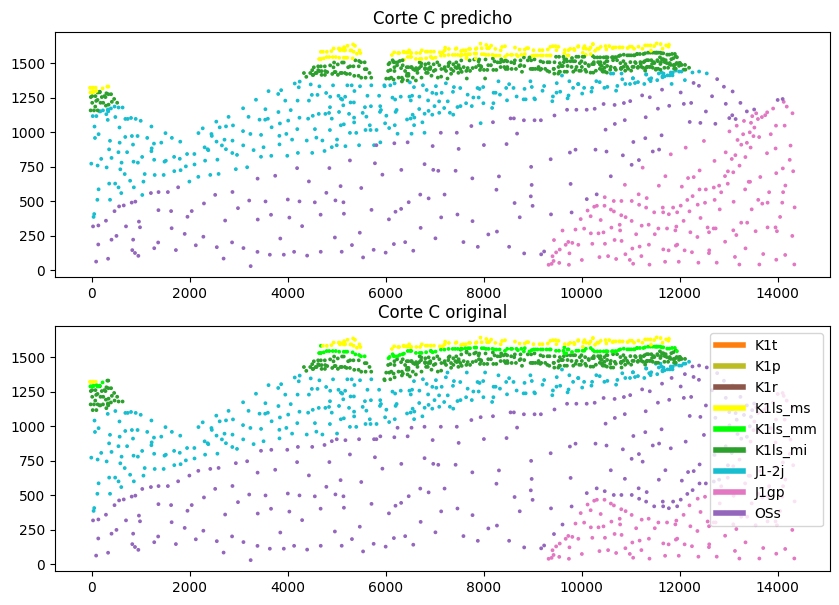

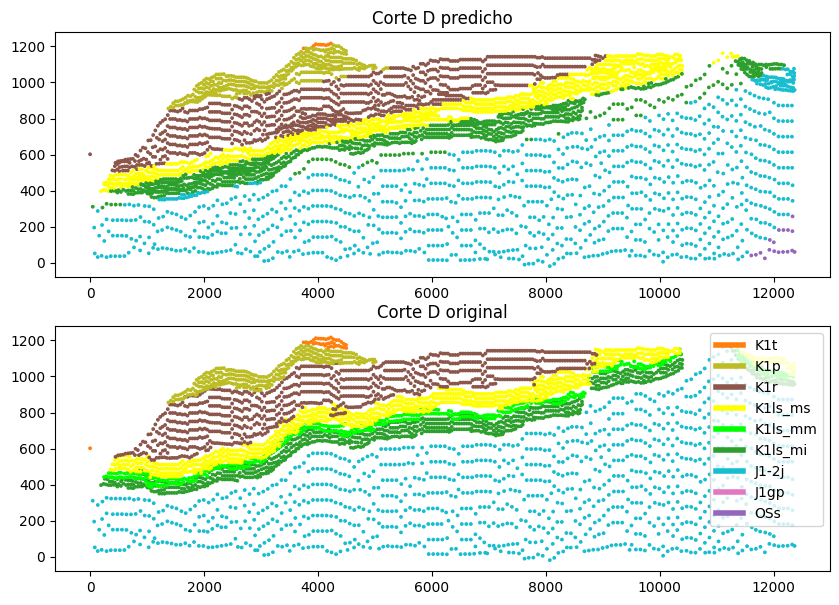

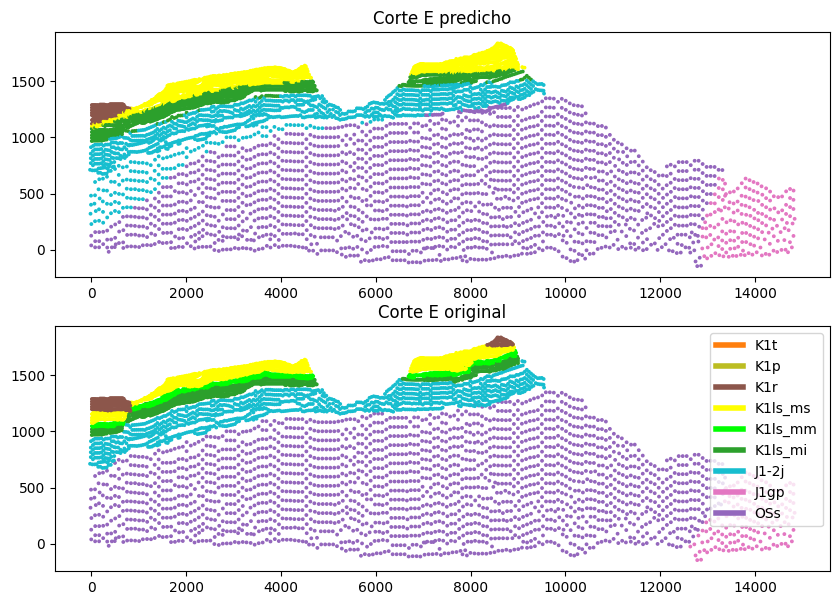

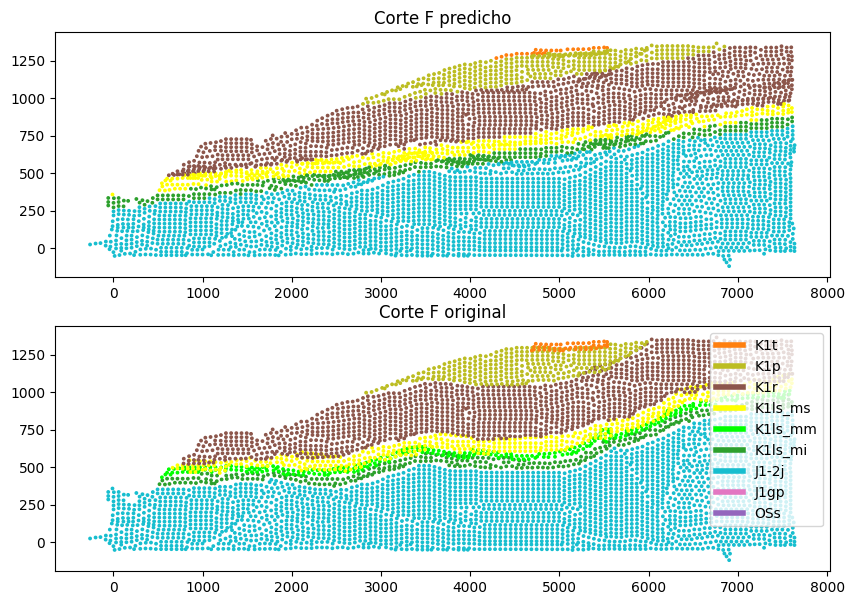

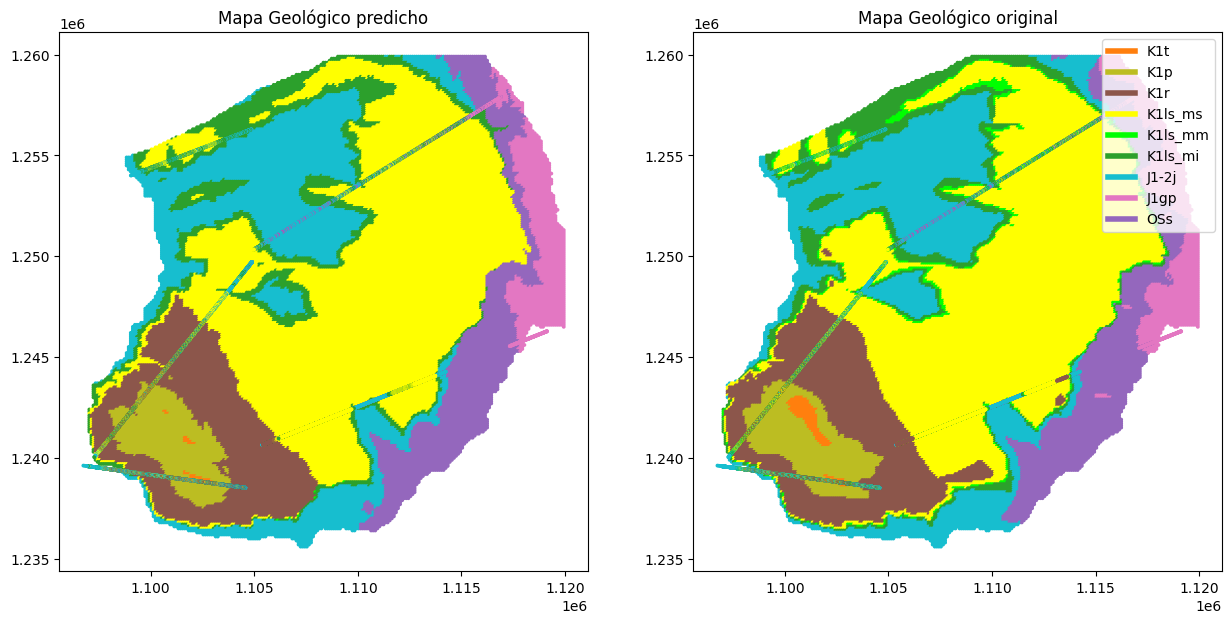

In [31]:
for i in df_GeoMesaLosSantos['corte'].unique():
  filtro = df_GeoMesaLosSantos['corte'] == i

  if i == 'mapa':
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
    ax[0].scatter(df_GeoMesaLosSantos['coorX'][filtro],
                  df_GeoMesaLosSantos['coorY'][filtro],
                  color=df_GeoMesaLosSantos['Col-pred'][filtro],
                  s=3)
    ax[0].set_title('Mapa Geológico predicho')

    ax[1].scatter(df_GeoMesaLosSantos['coorX'][filtro],
                  df_GeoMesaLosSantos['coorY'][filtro],
                  color=df_GeoMesaLosSantos['color'][filtro],
                  s=3)
    ax[1].legend(lineasGeo, labelsGeo, loc=1)
    ax[1].set_title('Mapa Geológico original')

    plt.show()

  else:
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,7))
    ax[0].scatter(df_GeoMesaLosSantos['X'][filtro],
                  df_GeoMesaLosSantos['Z'][filtro],
                  color=df_GeoMesaLosSantos['Col-pred'][filtro],
                  s=3)
    ax[0].set_title('Corte {} predicho'.format(i.upper()))

    ax[1].scatter(df_GeoMesaLosSantos['X'][filtro],
                  df_GeoMesaLosSantos['Z'][filtro],
                  color=df_GeoMesaLosSantos['color'][filtro],
                  s=3)
    ax[1].legend(lineasGeo, labelsGeo, loc=1)
    ax[1].set_title('Corte {} original'.format(i.upper()))

    plt.show()

  print('\n')

# Observaciones

Como se indicó al inicio del Notebook, no se llevó a cabo un EDA. Posiblemente, desde la representación gráfica del mapa, pudo observar que, en la ubicación de los cortes, los puntos no se visualizaban de manera adecuada. ¿Es este un problema de visualización o hay alguna anomalía en los datos?

Además, el proceso para definir los parámetros del modelo es iterativo con el objetivo de obtener el mejor modelo o un puntaje `score` más cercano a `1`. Sin embargo, en nuestro contexto, es crucial conservar la coherencia geológica del modelo.

Se buscó utilizar la mayor cantidad posible de datos en el entrenamiento para evaluar si esto contribuía a mejorar el rendimiento del modelo. Pero, es posible que haya observado que una de las unidades geológicas no se predice de manera adecuada, y esto podría deberse a la cantidad limitada de información o muestras disponibles para esa unidad.

---
El `MLPClassifier` tiene algunas limitaciones y consideraciones importantes:

1. **Requiere Ajuste de Hiperparámetros:** la elección de hiperparámetros, como el número de capas ocultas, el número de neuronas por capa, la tasa de aprendizaje y la función de activación, puede afectar significativamente el rendimiento. En ocasiones, se necesita un ajuste fino para obtener resultados óptimos.

2. **Sensible a la Escala de Características:** los modelos de redes neuronales, incluido el MLP, son sensibles a la escala de las características. Es importante normalizar o estandarizar las variables de entrada antes de entrenar el modelo. Existen diferentes métodos para escalos los datos.

3. **Requiere Grandes Conjuntos de Datos para Modelos Complejos:** Modelos MLP complejos con muchas capas y neuronas pueden requerir conjuntos de datos grandes para evitar el sobreajuste (En próximos Notebooks se hablará sobre este término). La complejidad del modelo aumenta el riesgo de ajustarse demasiado a los datos de entrenamiento si la cantidad de datos es limitada.

4. **Computacionalmente Costoso:** entrenar modelos MLP complejos puede ser computacionalmente costoso, especialmente en conjuntos de datos grandes. El tiempo de entrenamiento puede ser considerable, y se recomienda el uso de hardware acelerado (por ejemplo, GPUs) para mejorar la eficiencia.

5. **Dependencia de los Datos de Entrenamiento:** el rendimiento del MLP puede depender en gran medida de la calidad y representatividad de los datos de entrenamiento. Si los datos de entrenamiento no capturan adecuadamente la variabilidad del problema, el modelo puede no generalizar bien a nuevos datos.



# Fin